<h2> Seasonality analysis </h2>
  - mapping on season dictionary
  - matplotlib timeseries with fillbetween
  - comparisons of ml and phys error by season (bar plots)

In [1]:
#01 - Import and consolidate the results for analysis
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv("results_test.csv", encoding="utf-8")
df['latlon'] = df['lat'].astype(str) + "|" + df['lon'].astype(str)
df['start_date'] = pd.to_datetime(df['start_date'])
df['month'] = pd.DatetimeIndex(df['start_date']).month
df['month2'] = df['month'].astype(str).str.zfill(2)
df['year'] = pd.DatetimeIndex(df['start_date']).year
df['yearmonth'] = df['year'].astype(str) + '-' + df['month2'].astype(str)
df['err'] = round(df['err'],3)
df['phys_err'] = round(df['phys_err'],3)

In [195]:
#Seasons
def season (x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    elif x in [9,10,11]:
        return 'fall'

#Locations
locations = pd.read_csv("locations.csv", encoding="utf-8")
locations.rename(columns={"Location": "latlon"}, inplace=True)
locations.sort_values(by=['latlon'], ascending=False)


,latlon,State,Sub-Region,Region
11,47.25|273.75,Michigan,East North Central,Midwest
10,47.25|271.75,Michigan,East North Central,Midwest
21,47.25|269.75,Wisconsin,East North Central,Midwest
154,47.25|267.75,Minnesota,West North Central,Midwest
153,47.25|265.75,Minnesota,West North Central,Midwest
...,...,...,...,...
182,29.25|261.75,Texas,West South Central,South
181,29.25|259.75,Texas,West South Central,South
119,27.25|279.75,Florida,South Atlantic,South
118,27.25|277.75,Florida,South Atlantic,South


In [196]:
#Map season and location
df['season'] = df['month'].apply(season)
df = pd.merge(df, locations, on='latlon')
df

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,phys_err,latlon,month,month2,year,yearmonth,season,State,Sub-Region,Region
0,2019-10-01|27.25|261.75,2019-10-01,27.25,261.75,1.028229,22.870967,2.045002,-0.014837,22.840626,24.973697,...,-5.014,27.25|261.75,10,10,2019,2019-10,fall,Texas,West South Central,South
1,2019-10-08|27.25|261.75,2019-10-08,27.25,261.75,1.093624,21.721882,1.985609,-1.286955,19.166492,23.893391,...,-1.340,27.25|261.75,10,10,2019,2019-10,fall,Texas,West South Central,South
2,2019-10-15|27.25|261.75,2019-10-15,27.25,261.75,1.043933,20.675154,2.121438,-1.040800,18.467161,22.889792,...,-0.640,27.25|261.75,10,10,2019,2019-10,fall,Texas,West South Central,South
3,2019-10-22|27.25|261.75,2019-10-22,27.25,261.75,0.892237,19.451975,2.304340,-1.896681,15.081376,21.507993,...,2.745,27.25|261.75,10,10,2019,2019-10,fall,Texas,West South Central,South
4,2019-10-29|27.25|261.75,2019-10-29,27.25,261.75,0.883454,18.518180,2.384524,-1.176233,15.713424,20.624798,...,2.113,27.25|261.75,10,10,2019,2019-10,fall,Texas,West South Central,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26393,2021-06-29|47.25|273.75,2021-06-29,47.25,273.75,-0.061508,15.384313,2.808936,0.734029,17.446154,15.211542,...,-7.467,47.25|273.75,6,06,2021,2021-06,summer,Michigan,East North Central,Midwest
26394,2020-07-07|47.25|273.75,2020-07-07,47.25,273.75,-0.408582,16.091479,2.732136,-0.339037,15.165182,14.975177,...,-5.186,47.25|273.75,7,07,2020,2020-07,summer,Michigan,East North Central,Midwest
26395,2020-07-14|47.25|273.75,2020-07-14,47.25,273.75,-0.268441,16.598514,2.503675,-0.350005,15.722215,15.926424,...,-5.743,47.25|273.75,7,07,2020,2020-07,summer,Michigan,East North Central,Midwest
26396,2020-07-21|47.25|273.75,2020-07-21,47.25,273.75,-0.357121,16.739847,2.226671,0.118659,17.004061,15.944656,...,-7.025,47.25|273.75,7,07,2020,2020-07,summer,Michigan,East North Central,Midwest


In [197]:
#Map extremes
df['heatwave'] = df['tmp2m'] >34
df['coldwave'] = df['tmp2m'] <-10
df

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,month,month2,year,yearmonth,season,State,Sub-Region,Region,heatwave,coldwave
0,2019-10-01|27.25|261.75,2019-10-01,27.25,261.75,1.028229,22.870967,2.045002,-0.014837,22.840626,24.973697,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
1,2019-10-08|27.25|261.75,2019-10-08,27.25,261.75,1.093624,21.721882,1.985609,-1.286955,19.166492,23.893391,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
2,2019-10-15|27.25|261.75,2019-10-15,27.25,261.75,1.043933,20.675154,2.121438,-1.040800,18.467161,22.889792,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
3,2019-10-22|27.25|261.75,2019-10-22,27.25,261.75,0.892237,19.451975,2.304340,-1.896681,15.081376,21.507993,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
4,2019-10-29|27.25|261.75,2019-10-29,27.25,261.75,0.883454,18.518180,2.384524,-1.176233,15.713424,20.624798,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26393,2021-06-29|47.25|273.75,2021-06-29,47.25,273.75,-0.061508,15.384313,2.808936,0.734029,17.446154,15.211542,...,6,06,2021,2021-06,summer,Michigan,East North Central,Midwest,False,False
26394,2020-07-07|47.25|273.75,2020-07-07,47.25,273.75,-0.408582,16.091479,2.732136,-0.339037,15.165182,14.975177,...,7,07,2020,2020-07,summer,Michigan,East North Central,Midwest,False,False
26395,2020-07-14|47.25|273.75,2020-07-14,47.25,273.75,-0.268441,16.598514,2.503675,-0.350005,15.722215,15.926424,...,7,07,2020,2020-07,summer,Michigan,East North Central,Midwest,False,False
26396,2020-07-21|47.25|273.75,2020-07-21,47.25,273.75,-0.357121,16.739847,2.226671,0.118659,17.004061,15.944656,...,7,07,2020,2020-07,summer,Michigan,East North Central,Midwest,False,False


In [187]:
#Functions / Metrics
def mbe (x):
    return round(np.mean(x),3)

def mae (x):
    return round(np.mean(abs(x)), 3)

def sd (x):
    return round(np.std(x), 3)

In [132]:
#VAYUH.AI estimates
#Breakdowns by start_date, latlon, year, month, season, State, Region/Sub-Region, season/Region/Sub-Region, heatwave and coldwave
indexlist = ['start_date']
vayuhpivot = pd.pivot_table(data=df, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
vayuhpivot

,mbe,mae,sd
,err,err,err
start_date,,,
2019-01-01,1.696,1.696,1.788
2019-01-08,2.156,2.156,2.356
2019-01-15,3.392,3.392,3.194
2019-01-22,4.652,4.652,3.769
2019-01-29,4.320,4.320,3.597
...,...,...,...
2021-06-22,1.459,1.459,0.929
2021-06-29,1.126,1.126,0.949


In [133]:
#PHYSICS estimates
#Breakdowns by start_date, latlon, year, month, season, State, Region/Sub-Region, season/Region/Sub-Region, heatwave and coldwave
indexlist = ['start_date']
physicspivot = pd.pivot_table(data=df, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
physicspivot

,mbe,mae,sd
,phys_err,phys_err,phys_err
start_date,,,
2019-01-01,2.038,2.922,3.910
2019-01-08,2.044,3.245,4.450
2019-01-15,2.409,4.403,5.433
2019-01-22,2.478,5.155,6.157
2019-01-29,0.566,2.946,3.411
...,...,...,...
2021-06-22,-11.313,11.313,3.175
2021-06-29,-11.580,11.580,3.093


In [134]:
#merge for summary statistics
indexlist = ['year', 'season']
vayuhpivot = pd.pivot_table(data=df, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
physicspivot = pd.pivot_table(data=df, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
chartdata = pd.merge(vayuhpivot, physicspivot, on=indexlist)
chartdata

mbe    mae     sd      mbe      mae       sd
               err    err    err phys_err phys_err phys_err
year season                                                
2019 fall    2.810  2.810  2.043   -2.329    4.360    5.037
     spring  1.489  1.489  1.129   -4.458    4.680    3.564
     summer  1.279  1.279  0.964  -11.447   11.912    9.974
     winter  3.077  3.077  2.855    0.511    3.394    4.525
2020 fall    2.080  2.080  1.987   -0.484    7.013    8.074
     spring  1.920  1.920  1.573   -9.297    9.792    7.758
     summer  1.231  1.231  1.060  -10.925   10.925    4.344
     winter  1.996  1.996  1.674    5.217    9.867   11.495
2021 spring  1.768  1.768  1.411   -4.680    5.066    4.353
     summer  1.276  1.276  1.148  -15.056   15.056    6.233
     winter  2.955  2.955  3.162   13.264   14.301   13.355

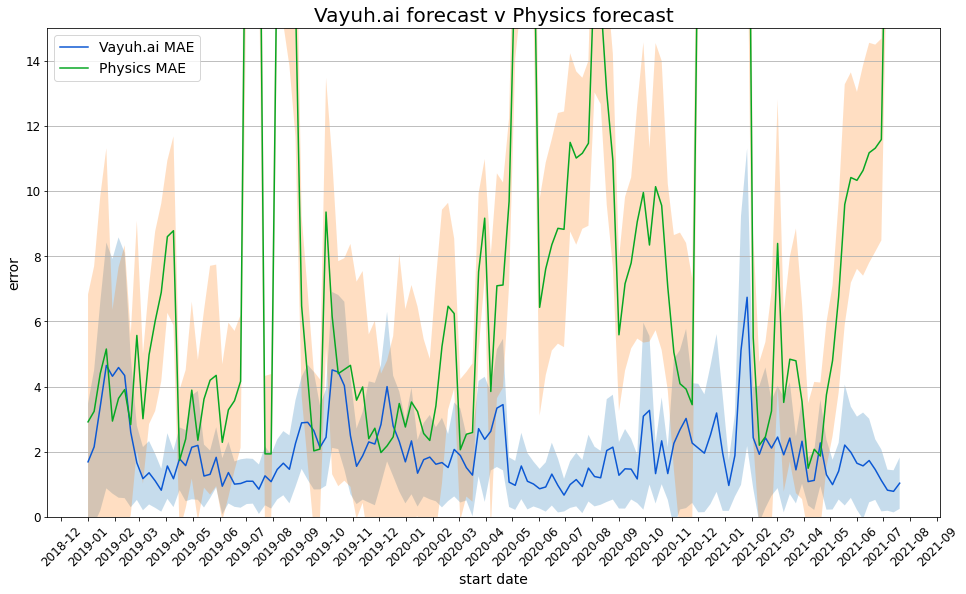

In [135]:
#P3a - Error comparisons with sd around error
#Vayuh blue: #0C58D3 (12, 88, 211); #Vayuh green: #06A723 (6, 167, 35)
#Vayuh light blue: #CFE2F3 (207, 226, 243), light blue 3; #Vayuh grey: #D9D9D9 (217, 217, 217), light grey 1
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#prepdata
indexlist = ['start_date']
vayuhpivot = pd.pivot_table(data=df, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
physicspivot = pd.pivot_table(data=df, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
chartdata = pd.merge(vayuhpivot, physicspivot, on='start_date')

fig = plt.figure(figsize=(16,9))
ax = plt.axes()
ax.grid(axis='y')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Vayuh.ai forecast v Physics forecast", fontsize=20)
plt.xlabel("start date", fontsize=14)
plt.ylabel("error", fontsize=14)
plt.ylim(0,15)
ax.xaxis.set_major_locator(mdates.MonthLocator()) #set ticks every week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #set major ticks format
plt.plot(chartdata.index, chartdata.mae.err, color = '#0C58D3', label='Vayuh.ai MAE')
ax.fill_between(chartdata.index, chartdata.mae.err - chartdata.sd.err, chartdata.mae.err + chartdata.sd.err, alpha=0.25)
plt.plot(chartdata.index, chartdata.mae.phys_err, color = '#06A723', label = 'Physics MAE')
ax.fill_between(chartdata.index, chartdata.mae.phys_err - chartdata.sd.phys_err, chartdata.mae.phys_err + chartdata.sd.phys_err, alpha=0.25)
#ax.fill_between(chartdata.index, 0, 5, alpha=0.25)
plt.legend(prop={"size":14})
fig.savefig('figs/'+'MAE'+'plot2.png', dpi = 300)

In [245]:
#Season / Region filters
seasonchoice = 'spring'; subregionchoice = 'East North Central'
df_subset = df[df['season']==seasonchoice]
df_subset = df_subset[df_subset['Sub-Region']==subregionchoice]
df_subset
indexlist = ['yearmonth']
vayuhpivot = pd.pivot_table(data=df_subset, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
physicspivot = pd.pivot_table(data=df_subset, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
chartdata = pd.merge(vayuhpivot, physicspivot, on=indexlist)
chartdata


,mbe,mae,sd,mbe,mae,sd
,err,err,err,phys_err,phys_err,phys_err
yearmonth,,,,,,
2019-03,0.915,0.915,0.688,-4.988,4.988,2.532
2019-04,1.395,1.395,0.870,-4.888,4.980,3.703
2019-05,1.590,1.590,0.942,-1.556,1.751,1.489
2020-03,2.362,2.362,2.074,-4.712,4.754,2.661
2020-04,3.810,3.810,2.240,-4.244,7.397,6.660
2020-05,1.319,1.319,0.904,-21.159,21.159,2.239
2021-03,3.304,3.304,1.305,-7.627,7.627,3.160
2021-04,2.108,2.108,1.379,-0.165,2.553,3.235


<Figure size 432x288 with 0 Axes>

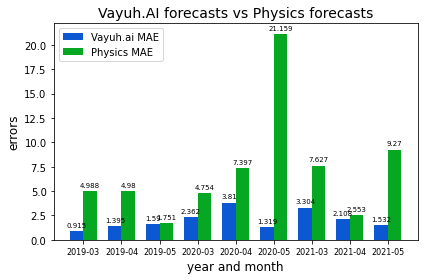

In [246]:
#Seasonality analysis plots using matplotlib and by region

#figsize=(16,9)
fig = plt.figure()
x = np.arange(len(chartdata.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, chartdata.mae.err, width, label='Vayuh.ai MAE', color = '#0C58D3')
rects2 = ax.bar(x + width/2, chartdata.mae.phys_err, width, label='Physics MAE', color = '#06A723')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('errors', fontsize=12)
plt.xlabel("year and month", fontsize=12)
ax.set_title('Vayuh.AI forecasts vs Physics forecasts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(chartdata.index, fontsize=8)
ax.legend()

ax.bar_label(rects1, padding=3, fontsize=7)
ax.bar_label(rects2, padding=3, fontsize=7)

fig.tight_layout()
plt.legend(prop={"size":10}, loc='upper left')
#plt.xticks(rotation=45, fontsize=10)
plt.show()
fig.savefig('figs/'+'MAE_'+seasonchoice+'_'+'plot.png', dpi = 500)